<a href="https://colab.research.google.com/github/popgenDK/evalPopStructure/blob/main/evalPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# load functions and test data



### Load evalPCAfunctions for plotting


In [23]:
#function plotCorRres for plotting correlations
source("https://raw.githubusercontent.com/popgenDK/evalPopStructure/main/R/evalPCA.R")


### Load test data

In [3]:

#load genetic test data
load(url("https://popgen.dk/albrecht/open/admixTjeck/data.Rdata"))

### summaries testdata



In [4]:

#transpose genotype
g <- t(geno)

cat("\ngenotype matrix (g) dimension \n")
dim(g)

cat("\nNumber of Individuals\n")
(N <- ncol(g))

cat("\nNumber of SNPs\n")
( M <- nrow(g))

cat("\n number of individual in each population\n")
pop <- as.factor(pop)
table(pop)


genotype matrix (g) dimension 


[1] 54048   374


Number of Individuals


[1] 374


Number of SNPs


[1] 54048


 number of individual in each population


pop
CEU CHB MXL YRI 
 99 103  64 108 

# PCA1 method. Chen and Storey 
There is no centering and the diagonal of the coverance has the mean heterozygoisty subtracted





no missing genotypes


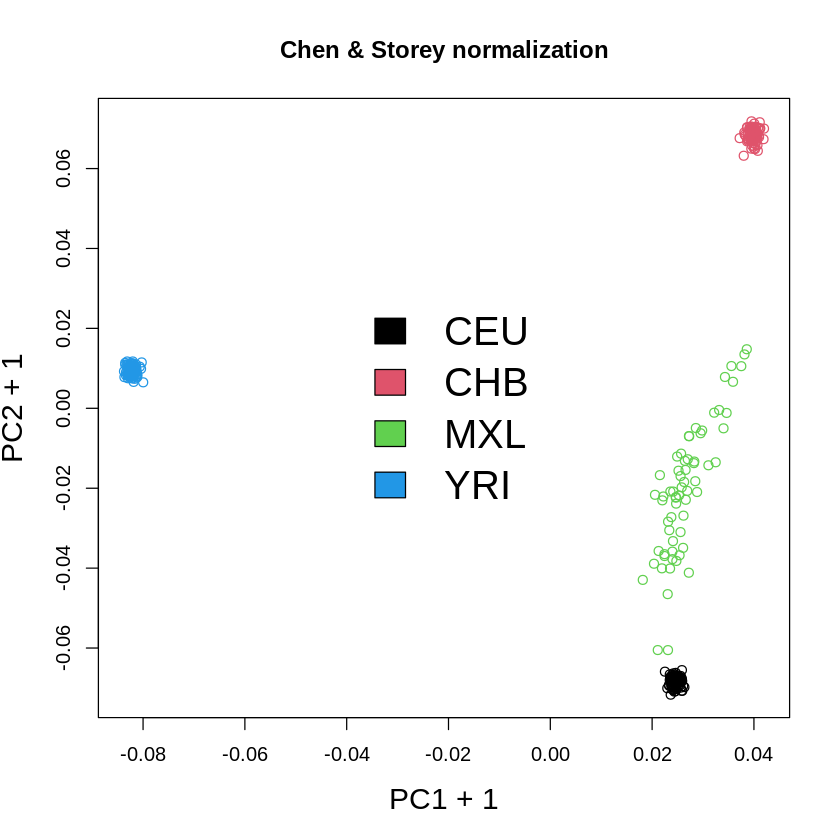

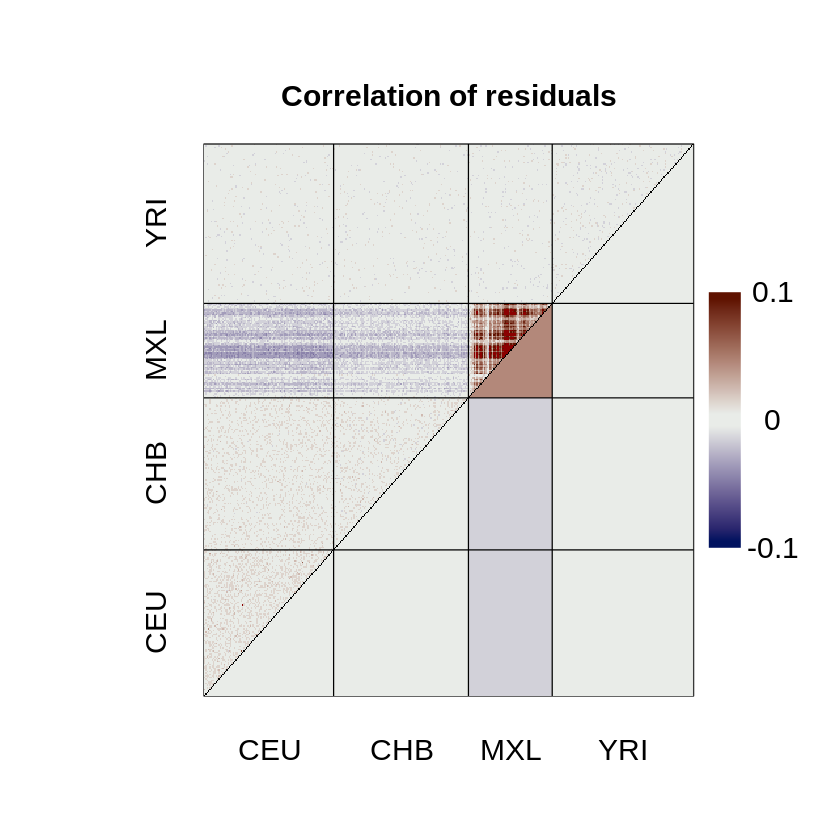

In [5]:

 pca1 <- makePCA(g,method="CS")
 plot(pca1$vectors[,1:2+1],col=pop,xlab="PC1 + 1",ylab="PC2 + 1",cex.lab=1.5,main="Chen & Storey normalization")
 legend("center",fill=1:4,levels(pop),cex=2,bty="n")


 res1 <- evalPCA(pca1,k=3)
 plotCorRes(res1$corres, pop)


# PCA2: Standard PCA with *centering* of genotypes


no missing genotypes


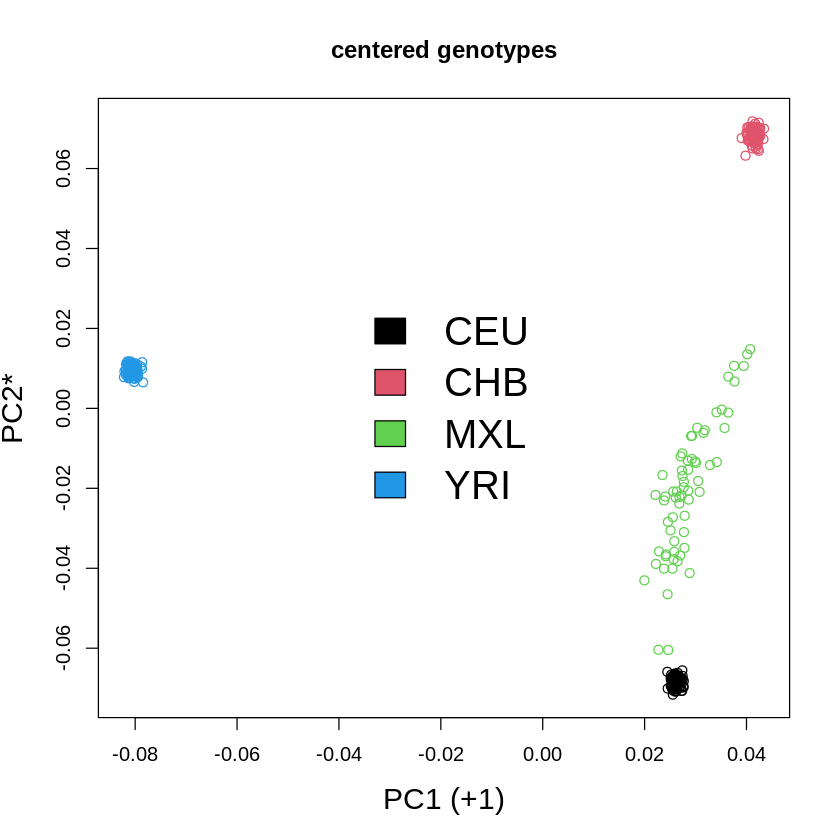

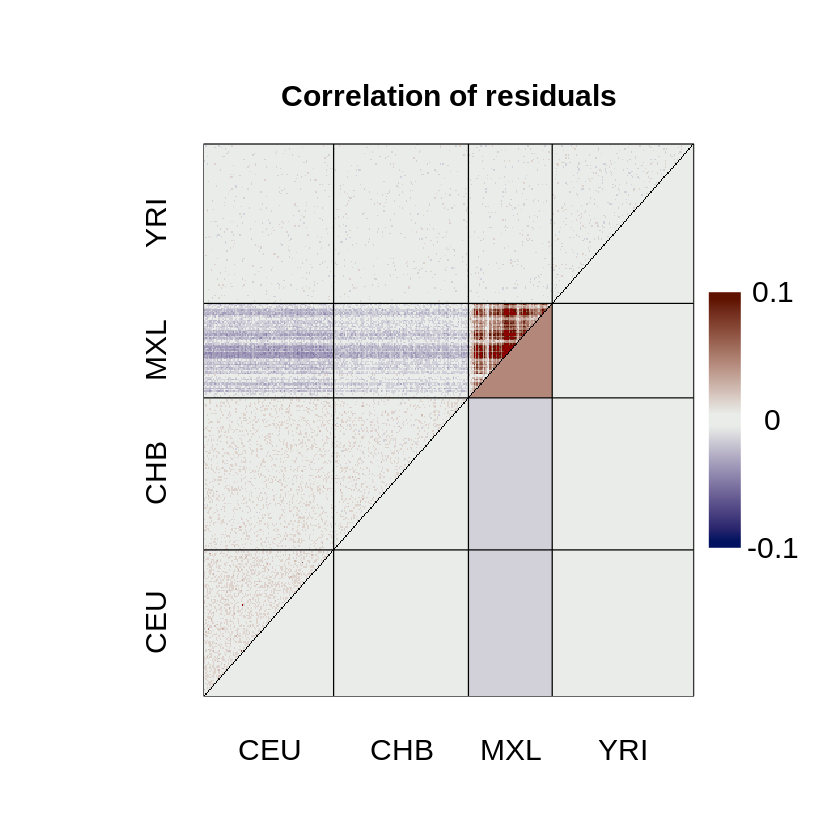

In [6]:

 pca2 <-  makePCA(g,method="standard",center=TRUE,scale=FALSE)
 plot(pca2$vectors[,1:2],col=pop,xlab="PC1 (+1)",ylab="PC2*",cex.lab=1.5,main="centered genotypes")
 legend("center",fill=1:4,levels(pop),cex=2,bty="n")


 res2 <- evalPCA(pca2,k=2)
 plotCorRes(res2$corres, pop,max=0.1)

# PCA3: Standard PCA with *centering* and scaling


no missing genotypes


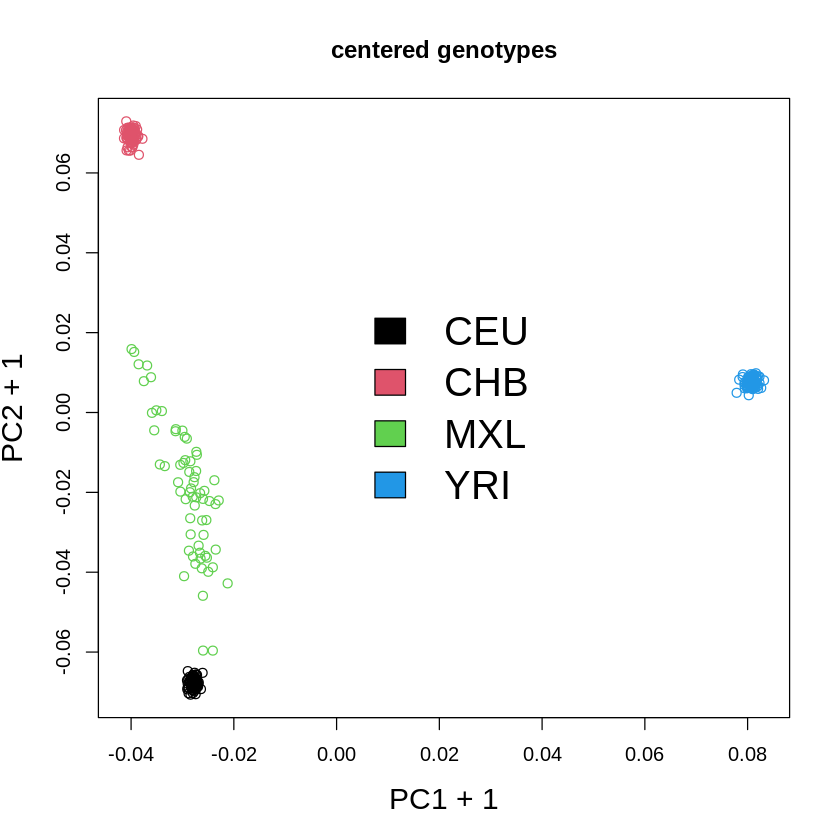

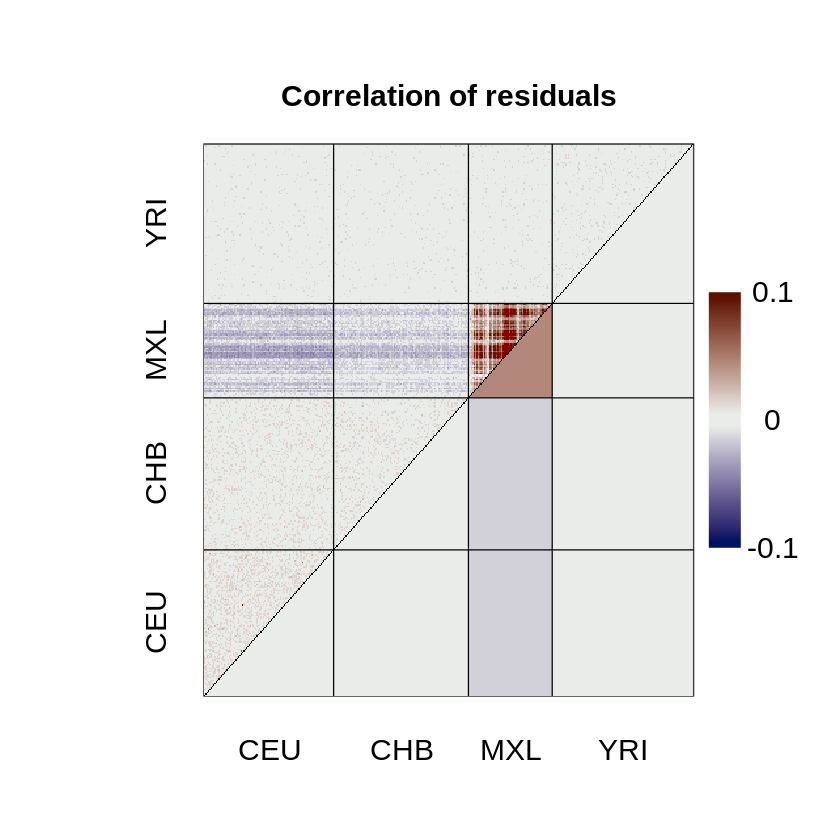

In [7]:

 pca3 <- makePCA(g,method="standard",center=TRUE,scale=TRUE)
 plot(pca3$vectors[,1:2],col=pop,xlab="PC1 + 1",ylab="PC2 + 1",cex.lab=1.5,main="centered genotypes")
 legend("center",fill=1:4,levels(pop),cex=2,bty="n")

 res3 <- evalPCA(pca3,k=2)
 plotCorRes(res3$corres, pop,max=0.1)


# ADMIXTURE: Fit of admixture proportions
After running ADMIXTURE the resulting admixture proportions (admixTjeck2.3.Q) and ancestral alleles frequencies (admixTjeck2.3.P) can be read into R. 


In [8]:
## read admixture propotions N x K 
Q <- read.table("https://raw.githubusercontent.com/popgenDK/evalPopStructure/main/data/admixTjeck2.3.Q")

## in addition to the estimated Q you also need the genotype matrix g (individuals must be in the same order)

Plot the results


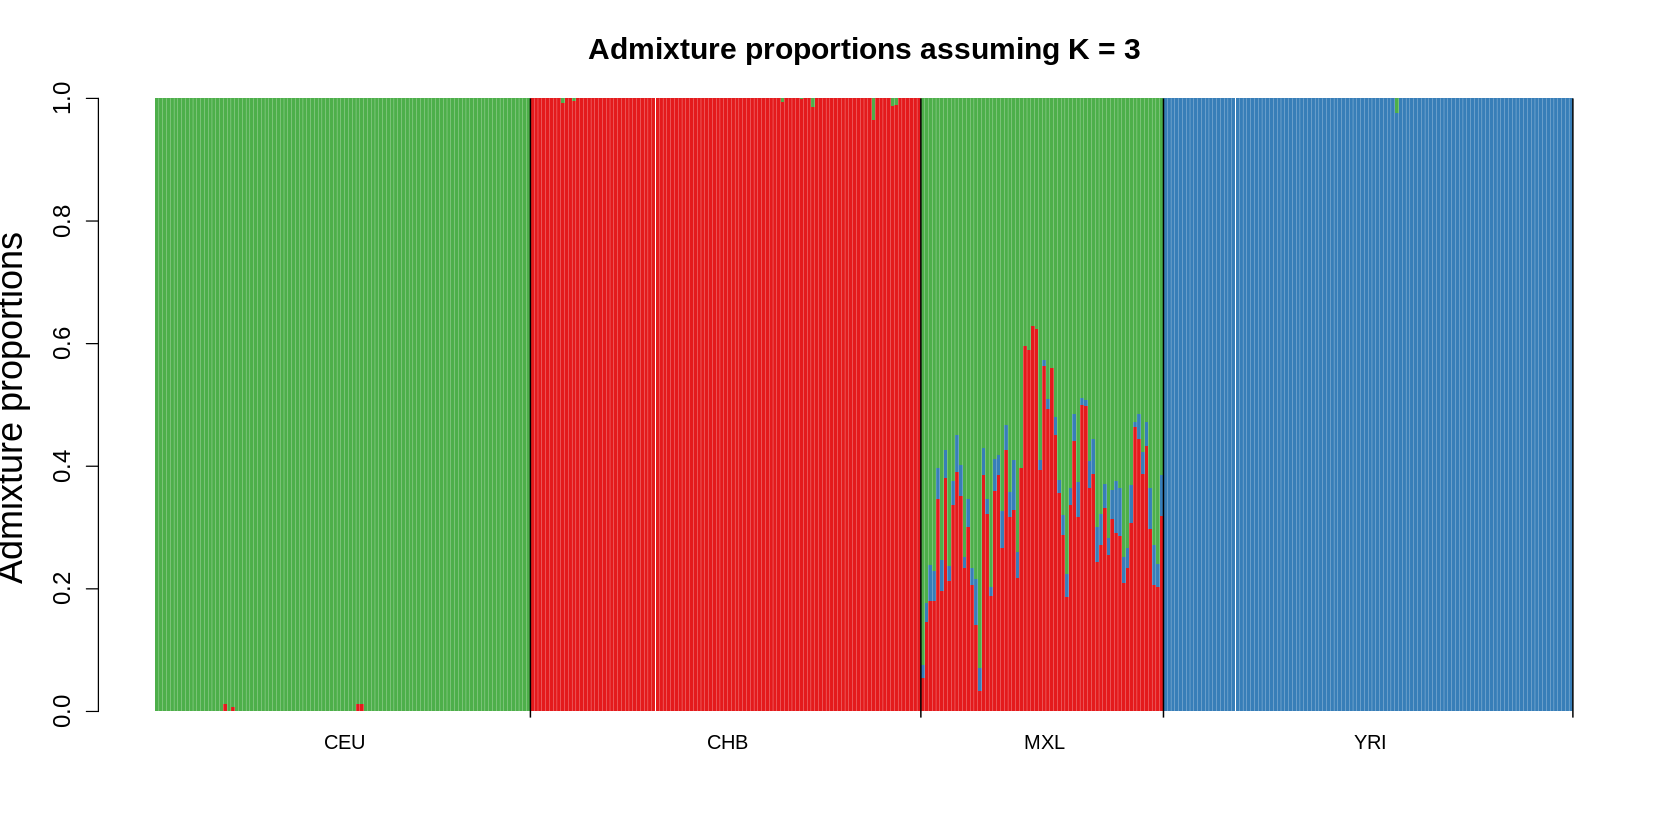

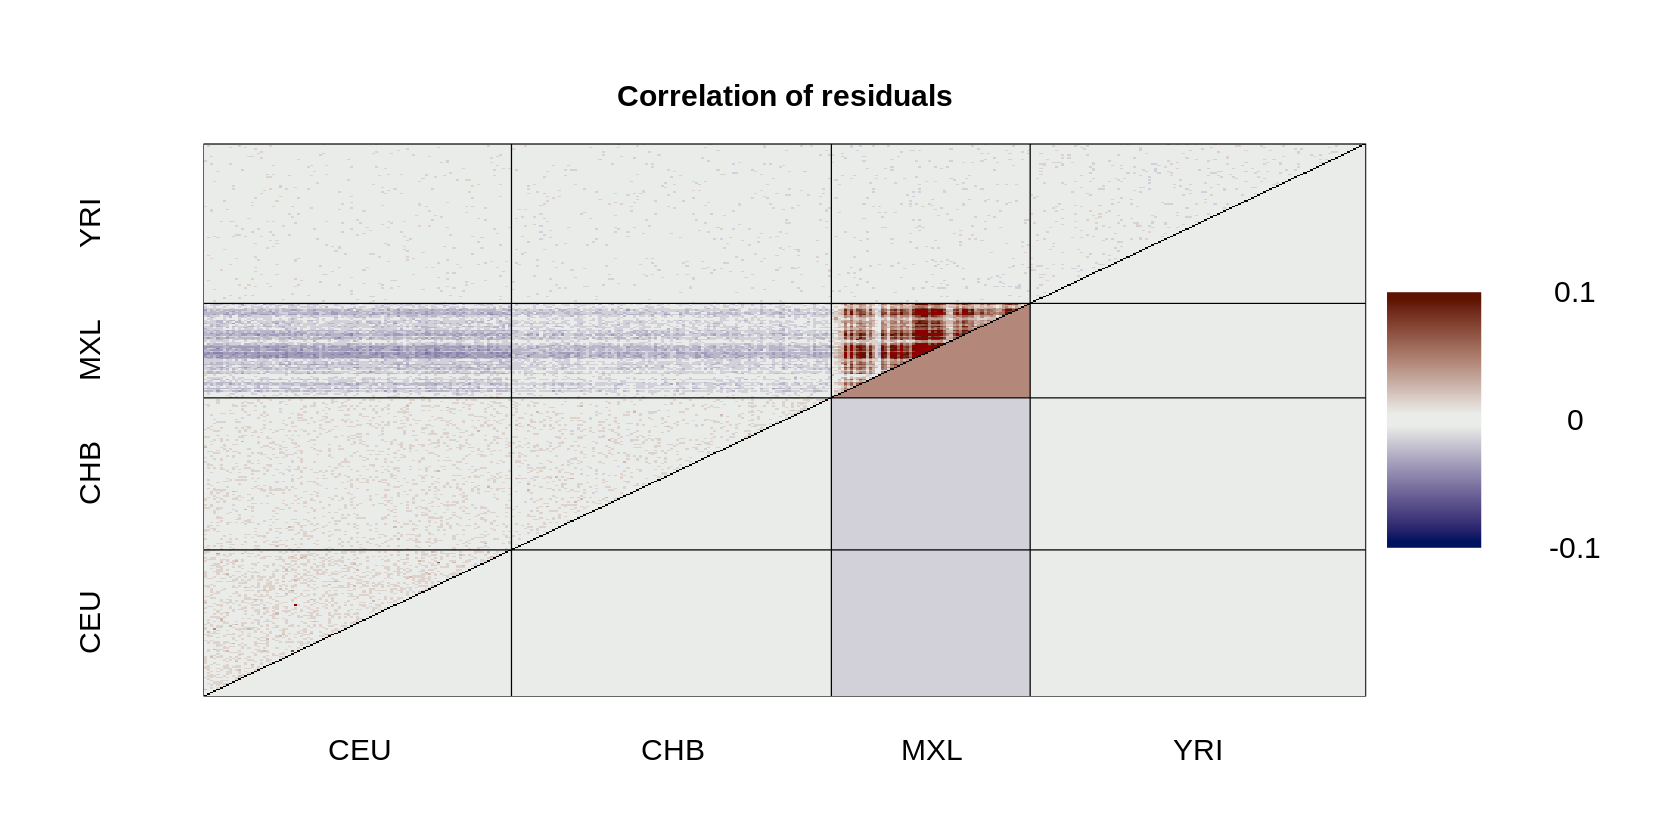

In [9]:
options(repr.plot.width=14, repr.plot.height=7)

## plot admixture
plotAdmix(Q,pop)


## evalulate admixture
eval <- evalPCA(list(method="admixture",g=g,Q=Q))
plotCorRes(eval$corres,pop=pop,max=0.1)


# Evaluation based on estimated individual allele frequencies

### individual allele frequencies based on ADMIXTURE/NGSadmix

estimated individual allele frequencies

[1] 54048   374

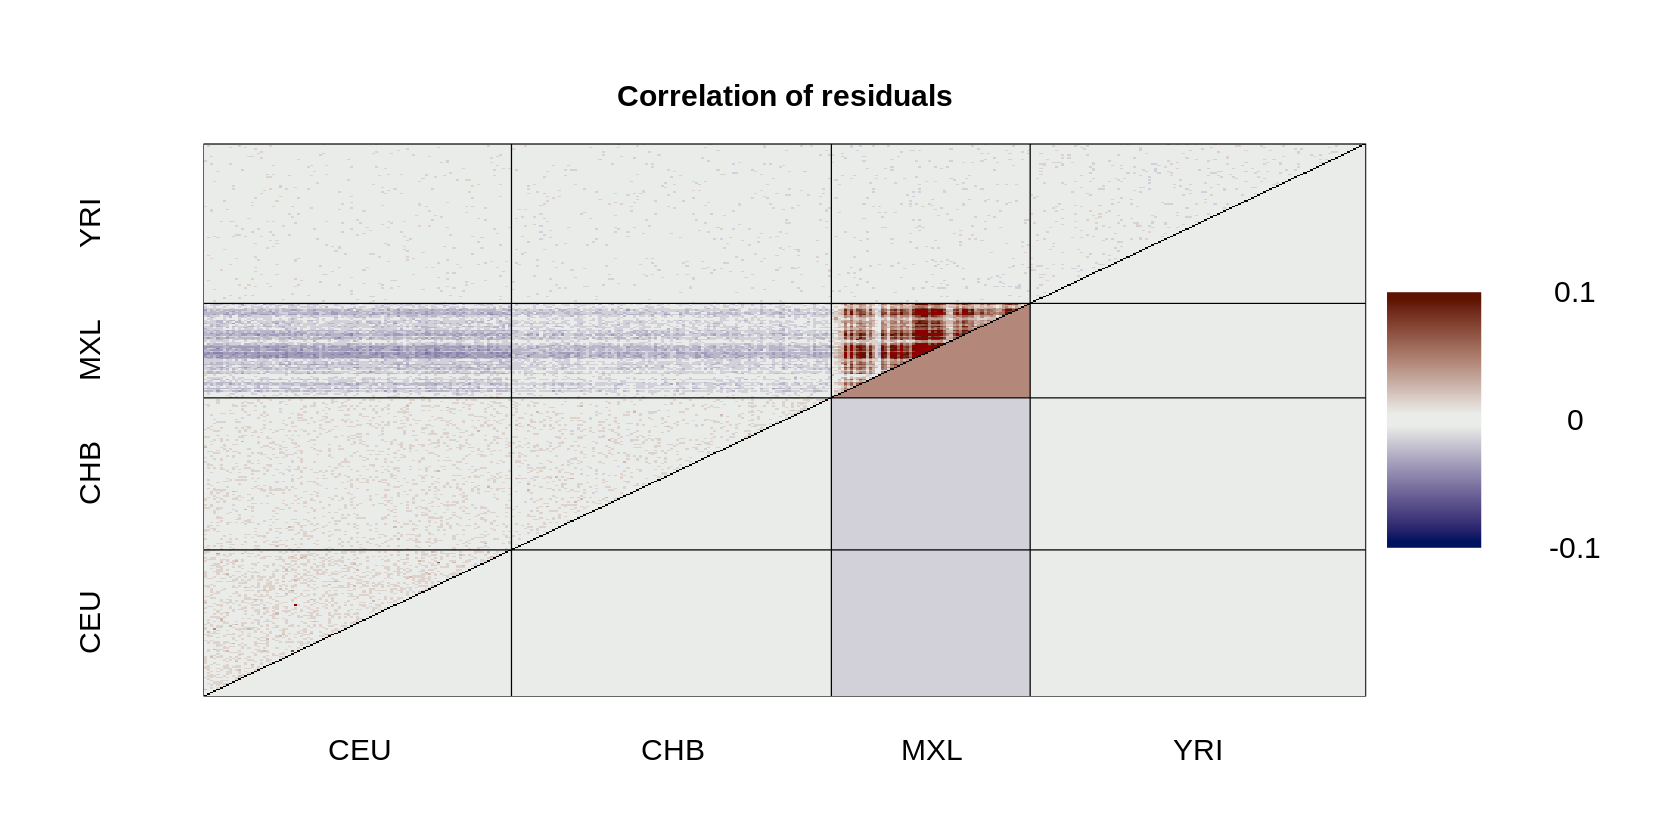

In [24]:
## read admixture propotions N x K 
Q <- t(as.matrix(read.table("https://raw.githubusercontent.com/popgenDK/evalPopStructure/main/data/admixTjeck2.3.Q")))

## read ancestral allele frequencies M x K
F <- as.matrix(read.table("https://raw.githubusercontent.com/popgenDK/evalPopStructure/main/data/admixTjeck2.3.P"))



## individual allele frequencies
PI <- F %*% Q

cat("estimated individual allele frequencies")
dim(PI)


eval <- evalPCA(list(method="PI",g=g,PI=PI))
plotCorRes(eval$corres,pop=pop,max=0.1)


### individual allele frequencies based on PCA

In [32]:

## installing a package is slow on colab 
cat("estimated individual allele frequencies from PCA")
dim(PI)
if(!require(pcaone)){
    install.packages("pcaone")
    library(pcaone)
}










estimated individual allele frequencies from PCA

[1] 54048   374

In [39]:
#center data
avg <- rowMeans(g)
gtilde <- g - avg
pca <- pcaone(gtilde,k=2) #very fast PCA (k PCs)



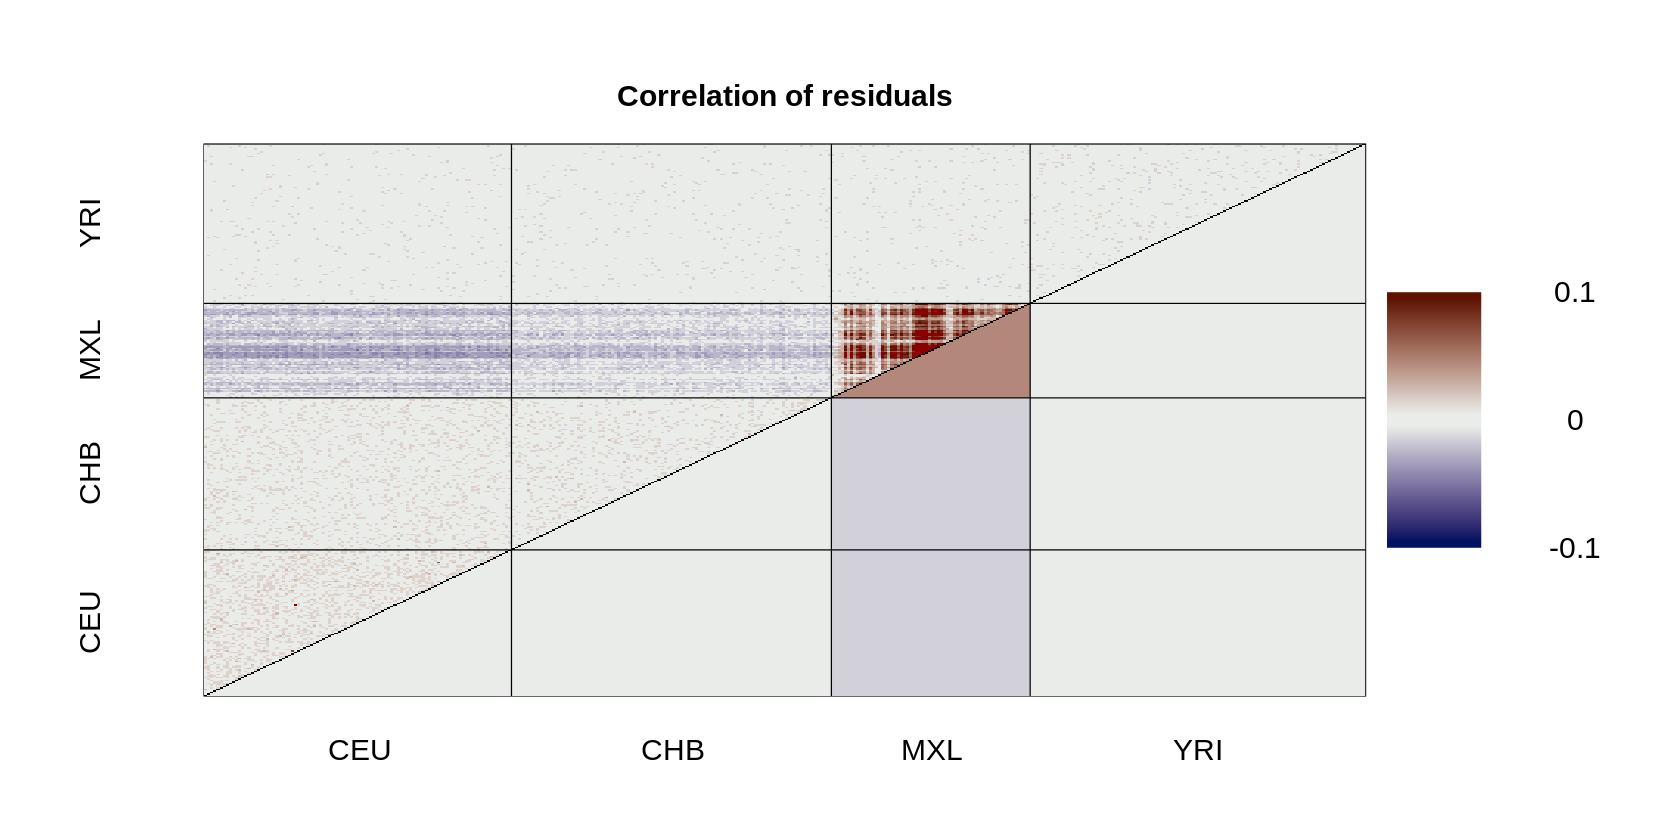

In [40]:

## use PCA to estimate individual allele frequencies
PI <- pca$u%*%diag(pca$d)%*%t(pca$v) + avg

eval <- evalPCA(list(method="PI",g=g,PI=PI))
plotCorRes(eval$corres,pop=pop,max=0.1)